<a href="https://colab.research.google.com/github/Md-Sakib-Hossain-Shovon/Algorithm/blob/master/HE_Xception_Transfer_Learning_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, BatchNormalization, concatenate, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape
from keras.callbacks import EarlyStopping
from keras.layers.core import SpatialDropout2D
from keras import backend as K
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
import pandas as pd
import glob
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
from keras.models import load_model
import itertools 
filterwarnings('ignore')
np.random.seed(101)
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
train_dir ="/content/drive/MyDrive/BC_Data/IHC/train_jpg"
val_dir = "/content/drive/MyDrive/BC_Data/IHC/test_jpg"
test_dir="/content/drive/MyDrive/BC_Data/IHC/test_jpg"
labels = ['0', '1', '2', '3']
label_np=np.array(labels)

In [5]:
import tensorflow as tf
import numpy as np
import os
import random


def set_seed(seed):
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)


seed = 101
set_seed(seed)

In [6]:
model1 = Xception(include_top=False,input_shape=(224, 224,3), weights='imagenet')
input_shape = (224, 224)

83697664/83683744 [==============================] - 1s 0us/step


In [7]:
datagen_train = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  vertical_flip=False)



datagen_test = ImageDataGenerator(rescale=1./255)

datagen_val=ImageDataGenerator(rescale=1./255)

batch_size = 32
generator_train = datagen_train.flow_from_directory(directory=train_dir,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,                                        
                                                    shuffle=True)

generator_val = datagen_val.flow_from_directory(directory=val_dir,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  shuffle=False)
generator_test=datagen_test.flow_from_directory(directory=test_dir,
                                                  target_size=input_shape,
                                                 batch_size=batch_size,
                                                 shuffle=False)

Found 3896 images belonging to 4 classes.
Found 977 images belonging to 4 classes.
Found 977 images belonging to 4 classes.


In [8]:
def print_layer_trainable():
    for layer in model1.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))
# print_layer_trainable()

In [9]:
headModel = model1.output
headModel = layers.Flatten()(headModel)
headModel = Dense(4, activation="softmax")(headModel)
model = Model(inputs=model1.input, outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [10]:
optimizer = Adam(lr=1e-5)
loss = 'categorical_crossentropy'
metrics = ['accuracy','Precision','Recall']

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [11]:

#from keras import callbacks
#earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        #mode ="min", patience = 3, 
                                        #restore_best_weights = True)
  
#history = model.fit(partial_images, partial_labels, batch_size = 128, 
                    #epochs = 25, validation_data =(val_images, val_labels), 
                    #callbacks =[earlystopping])
#epochs = 1

steps_per_epoch = generator_train.n / batch_size
steps_test = generator_test.n / batch_size

earlystopping = EarlyStopping(monitor ="val_loss", 
                              mode ="min", patience = 3, 
                              restore_best_weights = True)
history = model.fit_generator(generator=generator_train,
                              epochs=30,
                              #steps_per_epoch = generator_train.n / batch_size,
                              #steps_per_epoch=steps_per_epoch,
                              validation_data=generator_val,
                              #steps_test = generator_test.n / batch_size,
                              validation_steps=steps_test,
                              callbacks =[earlystopping]
                              )


Epoch 1/30
122/122 [==============================] - 1805s 15s/step - loss: 1.1518 - accuracy: 0.4682 - precision: 0.5771 - recall: 0.1863 - val_loss: 1.0776 - val_accuracy: 0.5384 - val_precision: 0.6265 - val_recall: 0.3828
Epoch 2/30
122/122 [==============================] - 142s 1s/step - loss: 0.9607 - accuracy: 0.5755 - precision: 0.6845 - recall: 0.3876 - val_loss: 0.8912 - val_accuracy: 0.6070 - val_precision: 0.6717 - val_recall: 0.4964
Epoch 3/30
122/122 [==============================] - 142s 1s/step - loss: 0.8663 - accuracy: 0.6196 - precision: 0.7170 - recall: 0.4766 - val_loss: 0.7911 - val_accuracy: 0.6684 - val_precision: 0.7404 - val_recall: 0.5548
Epoch 4/30
122/122 [==============================] - 142s 1s/step - loss: 0.7714 - accuracy: 0.6645 - precision: 0.7501 - recall: 0.5516 - val_loss: 0.6855 - val_accuracy: 0.7134 - val_precision: 0.7963 - val_recall: 0.6203
Epoch 5/30
122/122 [==============================] - 143s 1s/step - loss: 0.6888 - accuracy: 0.71

In [13]:
#save_dir = "/content/drive/MyDrive/saved_models/Xception_"+str(epochs)+"epochs.h5"
save_dir = "/content/drive/MyDrive/xception.h5"
model.save(save_dir)

In [14]:
preds = model.predict_generator(generator_test)

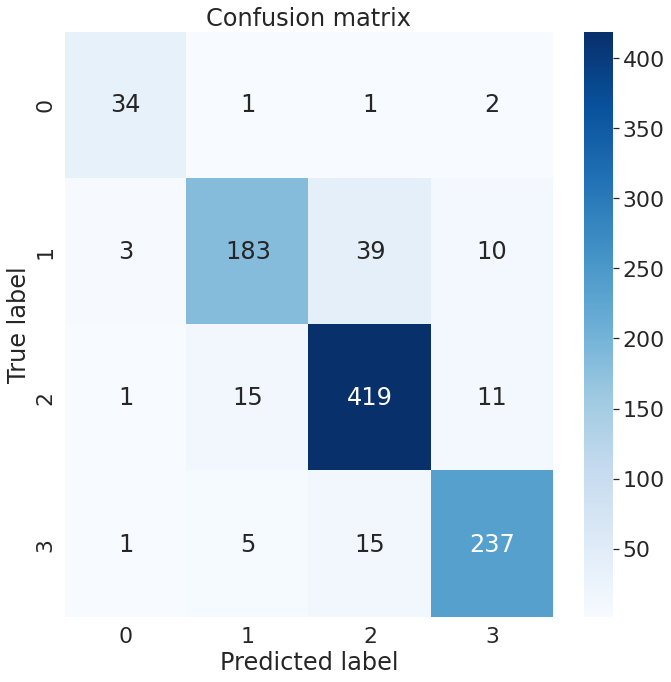

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(generator_test)
y_pred = np.argmax(Y_pred, axis=1)
array = confusion_matrix(generator_test.classes, y_pred)
df_cm = pd.DataFrame(array, index =['0', '1', '2', '3'],
                  columns = ['0', '1', '2', '3'])
plt.figure(figsize=(10,10))
sn.set(font_scale=2)
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.tight_layout()
plt.savefig('Xception_confusion',dpi=200); 
plt.show()

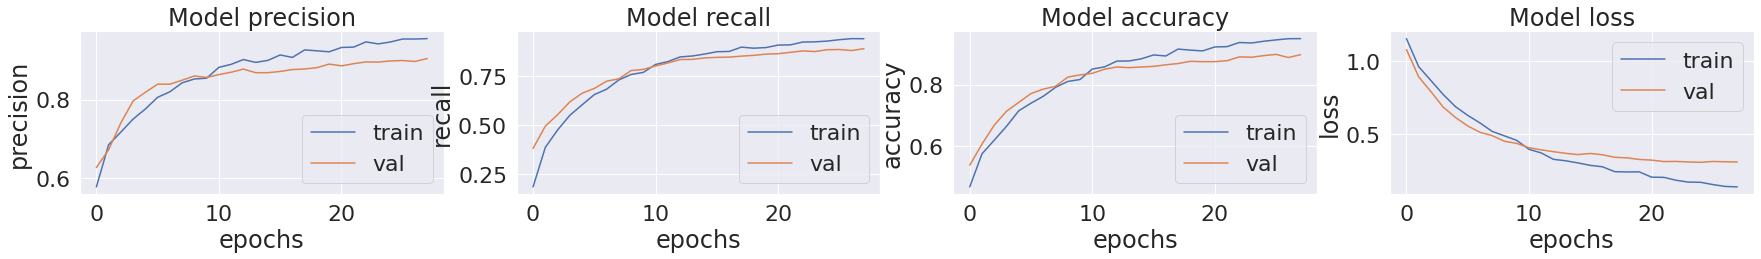

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(30, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall','accuracy',  'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [17]:
print(classification_report(generator_test.classes, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.90      0.78      0.83       235
           2       0.88      0.94      0.91       446
           3       0.91      0.92      0.92       258

    accuracy                           0.89       977
   macro avg       0.89      0.88      0.89       977
weighted avg       0.89      0.89      0.89       977



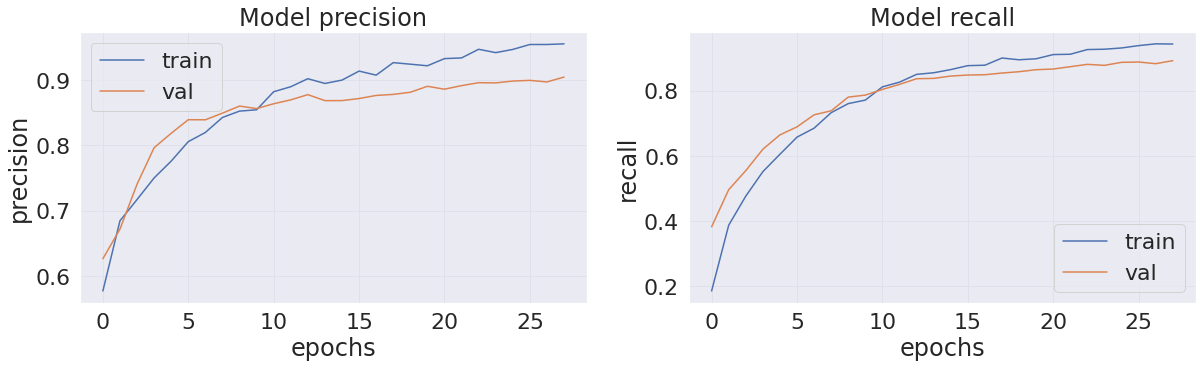

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(color = '#e0e0eb')
    ax[i].legend(['train', 'val'])

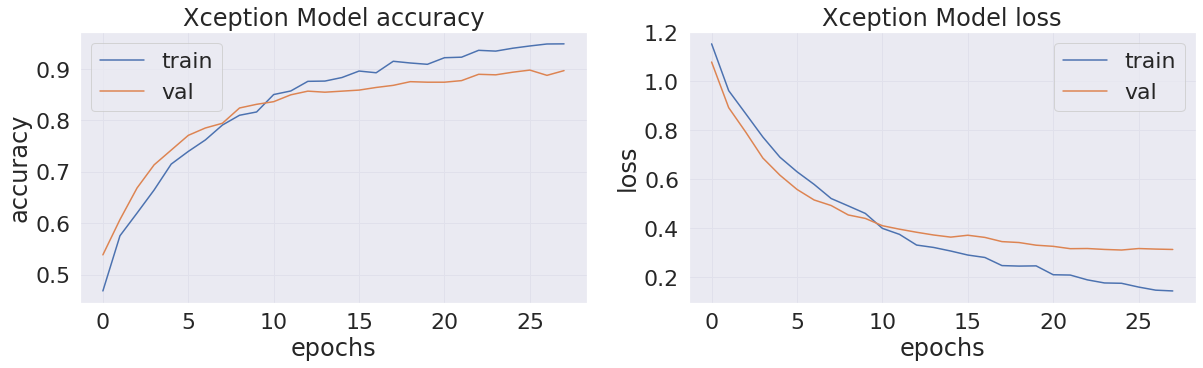

In [19]:

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax = ax.ravel()
for i, met in enumerate([ 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Xception Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].grid(color = '#e0e0eb')
    ax[i].legend(['train', 'val'],loc='best')
plt.show()

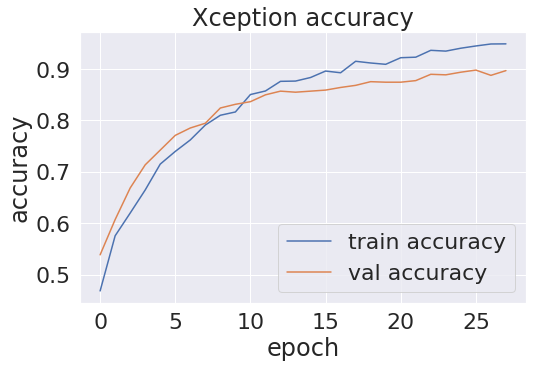

In [20]:

plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.set_facecolor("#eaeaf2")
plt.plot(history.history['accuracy'],label="train accuracy")
plt.plot(history.history['val_accuracy'],label="val accuracy")
plt.title('Xception accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(color = 'w')
plt.savefig('Xception_accuracy',dpi=200); 
plt.show()


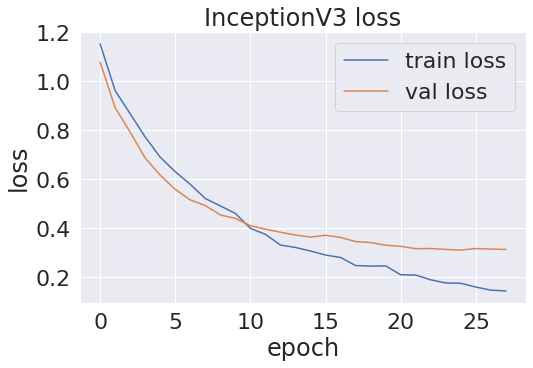

In [21]:
plt.figure(figsize=(8, 5))

ax = plt.axes()
ax.set_facecolor("#eaeaf2")
plt.plot(history.history['loss'],label="train loss")
plt.plot(history.history['val_loss'],label="val loss")
plt.title('InceptionV3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(color = 'w')
plt.savefig('Xception_loss',dpi=200); 
plt.show()